# Validate PFOA PBK model implementation in Antimony

In [1]:
import re
import math
import pandas as pd
import tellurium as te
import libsbml as ls
import pandas as pd
import matplotlib.pyplot as plt

fn_ant = '../Model/Antimony/PBK_PFAS.ant'


In [2]:
r = te.loada(fn_ant)

In [3]:
# Helper function for plotting simulation results
def plotSimulationResults(res, selections):
    fig, axes = plt.subplots(3,math.ceil((len(selections) - 1)/3),figsize=(10,6))
    axes = axes.flatten()
    for ax in axes:
        ax.set(xlabel='time') 
    labels = selections
    for i in range(1, len(selections)):
        sid = selections[i]
        axes[i-1].plot(res['time'], res[sid])
        axes[i-1].set(ylabel=f"Amount", title=labels[i])
    fig.tight_layout()

# Helper function for generating dosing events
def generateDoseEventsPattern(amount, start, step, stop):
    timings = range(start, stop, step)
    events = []
    for timing in timings:
        events.append((timing, amount))
    return events

## Run multiple doses

40.0
72.71999999999997


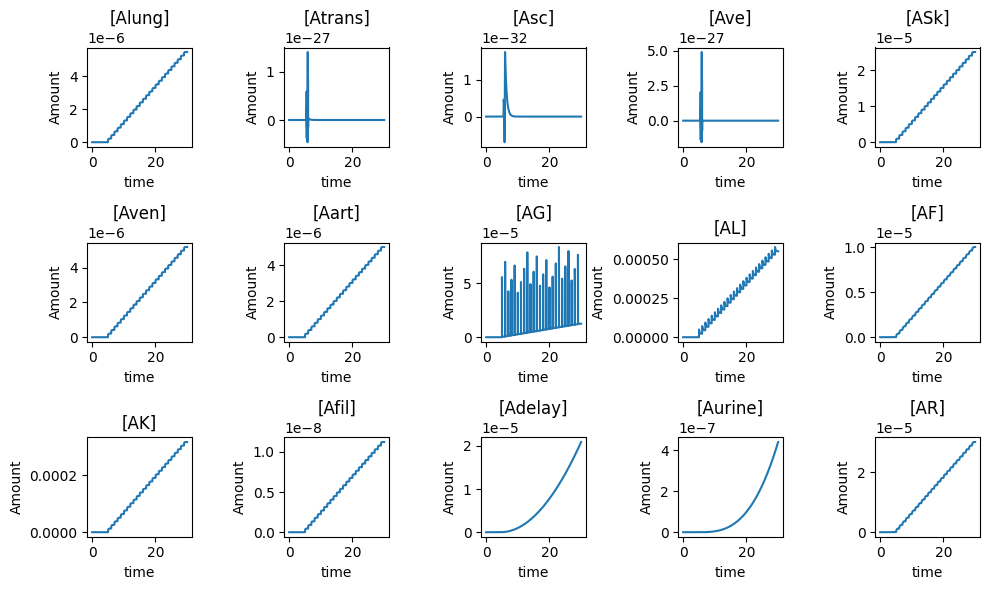

In [4]:
# Load the PBPK model from the SBML file
rr_model = te.loada(fn_ant)

# Specify the input
input_id = 'AG'

# Make sure A_gut is not constant and does not have boundary conditions
rr_model.setInitAmount(input_id, 0)
rr_model.setConstant(input_id, False)
rr_model.setBoundary(input_id, False)

# Remove all events
for event_id in rr_model.model.getEventIds():
    rr_model.removeEvent(event_id)

# Define a list of time/dose tuples
time_dose_list = generateDoseEventsPattern(0.0001, 5, 1, 30)

# Create an event for each of the time-dose tuples
for i in range(0, len(time_dose_list)):
    dose_event = time_dose_list[i]
    eid = f"oral_dose_event_{i}"
    rr_model.addEvent(eid, False, f"time > {dose_event[0]}", False)
    rr_model.addEventAssignment(eid, input_id, f"{input_id} + {dose_event[1]}", False)
rr_model.regenerateModel(True, True)

# Simulate the PBPK model
results = rr_model.simulate(start=0, end=30, points=10000)

# Plot the results
plotSimulationResults(results, rr_model.timeCourseSelections)

print(rr_model.age)
print(rr_model.BW)
